In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Import and copy data
df = pd.read_csv(r'C:\Users\user\Desktop\Ecom\AI - Ben\פרויקט סופרוויז לרנינג\Covid19_With_GDP_Values.csv')
df_copy = df.copy()
df_copy.head()


,Unnamed: 0,Country/Region,Date,Province/State,Confirmed,Deaths,Recovered,GDP,Unemployment,CPI
0,0,Afghanistan,2021-01-01,0,52513.0,2201.0,41727.0,1.426650e+10,11.934,NaN
1,1,Afghanistan,2022-01-01,0,158107.0,7356.0,0.0,1.450216e+10,14.100,NaN
2,2,Albania,2021-01-01,0,58316.0,1181.0,33634.0,1.793057e+10,12.473,123.448662
3,3,Albania,2022-01-01,0,210224.0,3217.0,0.0,1.891638e+10,11.588,131.750835
4,4,Algeria,2021-01-01,0,99897.0,2762.0,67395.0,1.862654e+11,13.607,166.218895


In [3]:
df_copy.drop("Province/State",axis = 1 ,inplace = True)

# We drop the "Province/State" column :

## Because this column represents the province of the country and this information is not relevant for calculation and prediction for the model. 
## It should be noted that in any case there is no much information in this column


In [4]:
df_copy.drop("Unnamed: 0",axis = 1 ,inplace = True)

# We drop the "Unnamed: 0" column :

## Because we already have an Index column and there is no need to add a separate column that will show this

In [5]:
df_copy

,Country/Region,Date,Confirmed,Deaths,Recovered,GDP,Unemployment,CPI
0,Afghanistan,2021-01-01,52513.0,2201.0,41727.0,1.426650e+10,11.934,NaN
1,Afghanistan,2022-01-01,158107.0,7356.0,0.0,1.450216e+10,14.100,NaN
2,Albania,2021-01-01,58316.0,1181.0,33634.0,1.793057e+10,12.473,123.448662
3,Albania,2022-01-01,210224.0,3217.0,0.0,1.891638e+10,11.588,131.750835
4,Algeria,2021-01-01,99897.0,2762.0,67395.0,1.862654e+11,13.607,166.218895
...,...,...,...,...,...,...,...,...
335,West Bank and Gaza,2022-01-01,469748.0,4919.0,0.0,1.916550e+10,24.420,117.301113
336,Zambia,2021-01-01,20997.0,390.0,18773.0,2.209642e+10,5.195,299.818966
337,Zambia,2022-01-01,257948.0,3740.0,0.0,2.916378e+10,5.993,332.778677
338,Zimbabwe,2021-01-01,14084.0,369.0,11347.0,2.837124e+10,9.540,5411.002445


In [6]:
df_copy.isnull().sum()

Country/Region    0
Date              0
Confirmed         0
Deaths            0
Recovered         0
GDP               0
Unemployment      0
CPI               2
dtype: int64

In [7]:
df_copy.dropna(inplace=True)

In [8]:
df_copy.isnull().sum()

Country/Region    0
Date              0
Confirmed         0
Deaths            0
Recovered         0
GDP               0
Unemployment      0
CPI               0
dtype: int64

# We drop the the 2 none column (Afghanistan):
## Because the amount of information is not significant for the calculation of the model (one country out of 170) and there is also no correct way to fill in the empty information

In [9]:
duplicate_rows = df_copy[df_copy.duplicated(keep=False)]
duplicate_rows


,Country/Region,Date,Confirmed,Deaths,Recovered,GDP,Unemployment,CPI


## there are no duplicated rows

In [10]:
grouped_data = df_copy.groupby('Country/Region')

numerical_columns = ['Confirmed', 'Deaths', 'Recovered', 'GDP', 'CPI']
summed_data = grouped_data[numerical_columns].sum()

mean_unemployment = grouped_data['Unemployment'].mean()

# Combine results
final_data = pd.concat([summed_data, mean_unemployment], axis=1)
final_data.reset_index(inplace=True)

In [11]:
final_data.drop("Country/Region",axis = 1 ,inplace = True)

## i drop the country column Because it's not a numerical figure, and this information is not relevant for calculation and prediction for the model. 

In [12]:
final_data.corr()

,Confirmed,Deaths,Recovered,GDP,CPI,Unemployment
Confirmed,1.000000,0.898002,0.928932,0.274813,-0.040822,-0.019040
Deaths,0.898002,1.000000,0.858794,0.243658,-0.039189,-0.013037
Recovered,0.928932,0.858794,1.000000,0.204519,-0.030528,-0.001739
GDP,0.274813,0.243658,0.204519,1.000000,-0.021508,-0.094615
CPI,-0.040822,-0.039189,-0.030528,-0.021508,1.000000,0.063644
Unemployment,-0.019040,-0.013037,-0.001739,-0.094615,0.063644,1.000000


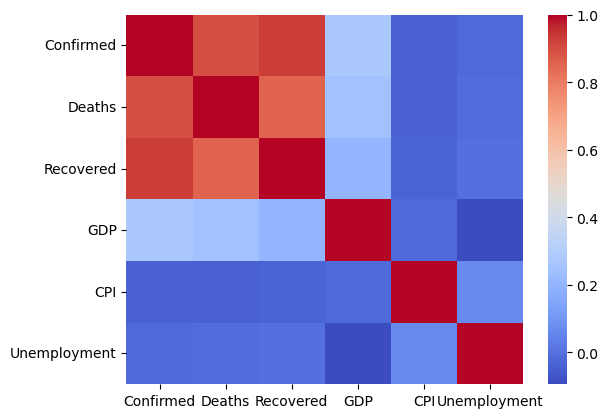

In [13]:
sns.heatmap(final_data.corr(), cmap = "coolwarm")
plt.show()

## As we can see there is a positive correlation between Confirmed and Deaths.
### It makes sense because A higher number of confirmed cases typically leads to a higher number of deaths.

## Also between Confirmed and Recovered but weaker.
### it's natural to expect an increase in the number of recovered cases over time.

## GDP has a negative correlation with Unemployment
### It makes sense that there are more unemployed people and there will be less GDP


In [14]:
X = final_data.drop('GDP', axis=1)
y = final_data['GDP']

# we prepare a dict that will contain all models rmse
rmse_values = {}

## preprae evaluate_model function

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate_model(y_pred, model_name):

    MAE_score = mean_absolute_error(y_test, y_pred)
    MSE_score = mean_squared_error(y_test, y_pred)
    RMSE_score = np.sqrt(MSE_score)

    print(f'MAE: {MAE_score}')
    print(f'MSE: {MSE_score}')
    print(f'RMSE: {RMSE_score}')

    rmse_values[model_name] = RMSE_score


## First of all we did a train test split and then only a standard scaler so as not to expose the scaler to all the data. 

# LinearRegression Model With KFold


In [16]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


kf = KFold(n_splits= 4 , shuffle=True, random_state=42)

scores = []
coefficients = []
intercepts = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    scaled_X_train = scaler.transform(X_train)
    scaled_X_test = scaler.transform(X_test)

    model = LinearRegression()
    model.fit(scaled_X_train, y_train)
 
    y_pred = model.predict(scaled_X_test)

    MAE_score = mean_absolute_error(y_test, y_pred)
    MSE_score = mean_squared_error(y_test, y_pred)
    RMSE_score = np.sqrt(MSE_score)
    scores.append(RMSE_score)

    coefficients.append(model.coef_)
    intercepts.append(model.intercept_)

    

best_score = min(scores)
best_param_place_in_array = scores.index(min(scores))
print(f" The Min RMSE is: {best_score} and his place in the array is {best_param_place_in_array}")

print("\n the best model Beta Coefficient we found are \n", coefficients[best_param_place_in_array])
print("\n and this model Intercept is:", intercepts [best_param_place_in_array])

rmse_values["LinearRegression Model With KFold"] = best_score


 The Min RMSE is: 655483632862.6309 and his place in the array is 2

 the best model Beta Coefficient we found are 
 [ 1.97689190e+12  9.14930975e+10 -1.22573641e+12 -1.88747428e+10
 -2.93115016e+11]

 and this model Intercept is: 911423344134.8558


# If we want to use this excat model we can Implement this on the Basic Linear Model Equation As we learned,
# The Equation is:

## y = β0 + β1*x1 + β2*x2 + ... + βn*xn

## so all we need now is to give the best param (intercept and coefficients) we found in the Equation and make new predctions.

### we could preform this code for this:


#### intercept =  intercepts[best_param_place_in_array]
#### coefficients = coefficients[best_param_place_in_array]
#### y_pred = intercept + np.dot(new_scaled_data_to_predict, coefficients)
#### print(y_pred)

# RidgeCV Model


In [17]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0), scoring='neg_mean_absolute_error')
ridge_cv_model.fit(scaled_X_train, y_train)

test_predictions = ridge_cv_model.predict(scaled_X_test)

evaluate_model(test_predictions, "RidgeCV Model")

MAE: 723112659167.7369
MSE: 1.657307088030391e+24
RMSE: 1287364395977.4524


In [18]:
print(f"The optimal alpha the CV model found is {ridge_cv_model.alpha_}")


The optimal alpha the CV model found is 0.1


In [19]:
print(f"the Beta Coefficients for best Ridge model we found are: \n {ridge_cv_model.coef_} ")


the Beta Coefficients for best Ridge model we found are: 
 [ 1.39860823e+12  1.18789326e+10 -7.80125142e+11 -5.61178706e+10
 -2.88335767e+11] 


# Now We Train a Rigde model on the optimal alpha we found

In [20]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(scaled_X_train, y_train)
test_predictions = ridge_model.predict(scaled_X_test)

# LassoCv Model

In [21]:
from sklearn.linear_model import LassoCV


lasso_cv_model = LassoCV(eps=0.1, n_alphas=100)
lasso_cv_model.fit(scaled_X_train, y_train)

lasso_test_predictions = lasso_cv_model.predict(scaled_X_test)

lasso_cv_optimal_alpha =lasso_cv_model.alpha_
print("The Optimal Alpha is :", lasso_cv_model.alpha_)

The Optimal Alpha is : 143345826340.5767


In [22]:
print("The Optimal Beta Coefficients Are: \n", lasso_cv_model.coef_)

The Optimal Beta Coefficients Are: 
 [ 5.57656205e+11  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -1.54372176e+11]


In [23]:
evaluate_model(lasso_test_predictions, "LassoCV Model")

MAE: 791349972082.7164
MSE: 1.8889012168608592e+24
RMSE: 1374373026823.8167


# Polynomial Regression Model

In [24]:
from sklearn.preprocessing import PolynomialFeatures

test_rmse_errors = []


for degree in range(1,10):
    polynomial_converter = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    scaled_X_train = scaler.transform(X_train)
    scaled_X_test = scaler.transform(X_test)

    model = LinearRegression()
    model.fit(scaled_X_train, y_train)
    
    
    test_predictions = model.predict(scaled_X_test)
    

    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    test_rmse_errors.append(test_rmse)

# Preform Elbow Method to Check Which Drgee is the Optimal Drgee

In [25]:
test_rmse_errors

[1287737326127.812,
 30817067638426.773,
 3.3304568626341116e+16,
 3.376912391320845e+19,
 8.609679703264621e+18,
 9.074352183663444e+18,
 8.151528695435143e+18,
 7.62157828511403e+18,
 6.779274101056103e+18]

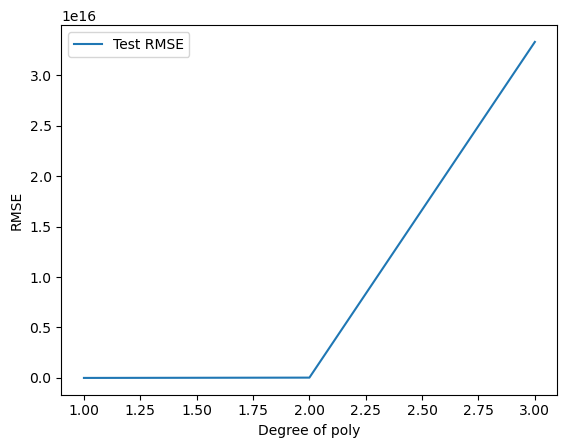

In [26]:
plt.plot(range(1,4), test_rmse_errors[:3], label='Test RMSE')

plt.ylabel('RMSE')
plt.xlabel('Degree of poly')
plt.legend()
plt.show()

# We Found that the optimal dgree is 1

In [27]:
polynomial_converter = PolynomialFeatures(degree=1, include_bias=False)
polynomial_converter.fit(X)
poly_features = polynomial_converter.transform(X)

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(scaled_X_train, y_train)
    
test_predictions = model.predict(scaled_X_test)
test_predictions

array([ 7.72163391e+11,  8.28141523e+11,  6.33509298e+11,  5.94066694e+11,
       -1.72734097e+11,  7.19678137e+12,  6.60643913e+11,  8.07137290e+11,
        5.46249869e+11,  3.23543282e+11,  4.63722009e+11,  4.02554208e+11,
        5.86676836e+11,  8.07640259e+11,  6.69519760e+11,  1.05122364e+11,
        8.48514591e+11,  5.18545535e+11,  7.06450329e+11, -1.36470208e+10,
        3.38465494e+11,  8.22407008e+11,  8.30252750e+11,  8.54992593e+11,
        4.89025670e+11,  7.50864404e+11,  8.37324597e+11,  4.02692706e+11,
        1.35872806e+12, -5.29665921e+10, -3.39087536e+11,  5.89517477e+11,
        8.06091344e+11,  7.29603977e+11,  8.04352915e+12,  7.30765503e+11,
        3.23632033e+11,  1.77687765e+12,  1.13709374e+12,  5.60964374e+11,
        6.77960009e+11,  7.23289912e+11,  9.20887103e+11,  8.41261032e+11,
        5.00079697e+11,  7.52881383e+11,  2.04433359e+11,  7.85895508e+11,
        9.73661439e+11,  9.28318675e+11,  9.12401274e+11])

In [28]:
print("The Optimal Beta Coefficients Are: \n", model.coef_)

The Optimal Beta Coefficients Are: 
 [ 1.40978629e+12  9.95860698e+09 -7.89181817e+11 -5.60186085e+10
 -2.88508506e+11]


In [29]:
evaluate_model(test_predictions, "Polynomial Regression")

MAE: 723618305740.744
MSE: 1.658267421102807e+24
RMSE: 1287737326127.812


# Plot the error of each model

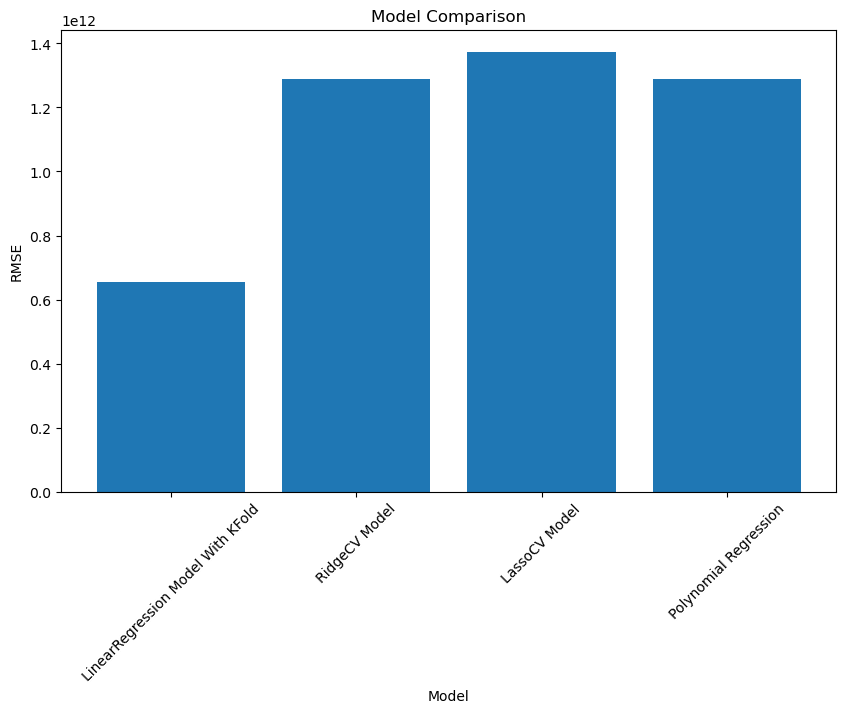

In [30]:
models = list(rmse_values.keys())
rmse_scores = list(rmse_values.values())


plt.figure(figsize=(10, 6))
plt.bar(models, rmse_scores)
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("Model Comparison")
plt.xticks(rotation=45)
plt.show()

# Train And Export the best model

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
scaler.fit(X_train)


scaled_X = scaler.transform(X)
final_model = LinearRegression()
final_model.fit(scaled_X, y)
final_model.coef_

array([ 1.31943903e+12,  9.78434797e+10, -8.10741490e+11, -6.51405602e+09,
       -2.61755936e+11])

In [32]:
from joblib import dump,load
dump(final_model, "final_covid_model.joblib")
dump(scaler, "covid_scaler.joblib")

['covid_scaler.joblib']

In [33]:
loaded_model = load("final_covid_model.joblib")
loaded_scaler = load("covid_scaler.joblib")

In [34]:
loaded_model.coef_

array([ 1.31943903e+12,  9.78434797e+10, -8.10741490e+11, -6.51405602e+09,
       -2.61755936e+11])